In [1]:
# Import dstools (absolute path required, please change to your systems settings)
import importlib
import sys

path = '/dstools-master/dstools/__init__.py'
name = 'dstools'

spec = importlib.util.spec_from_file_location(name, path)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module
spec.loader.exec_module(module)

In [20]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

from dstools.tools import quality

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Gewichtsklasse.csv', delimiter=';')

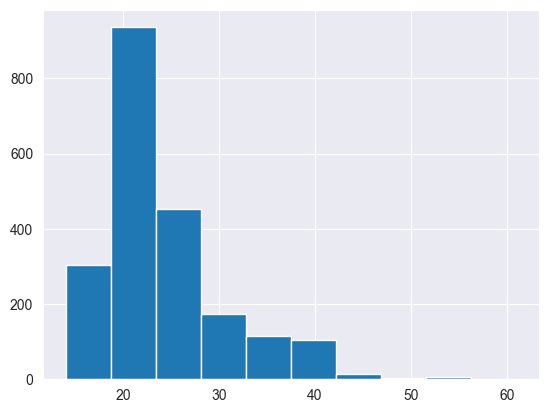

In [4]:
# Alter
plt.hist(df['Alter'])
plt.show()

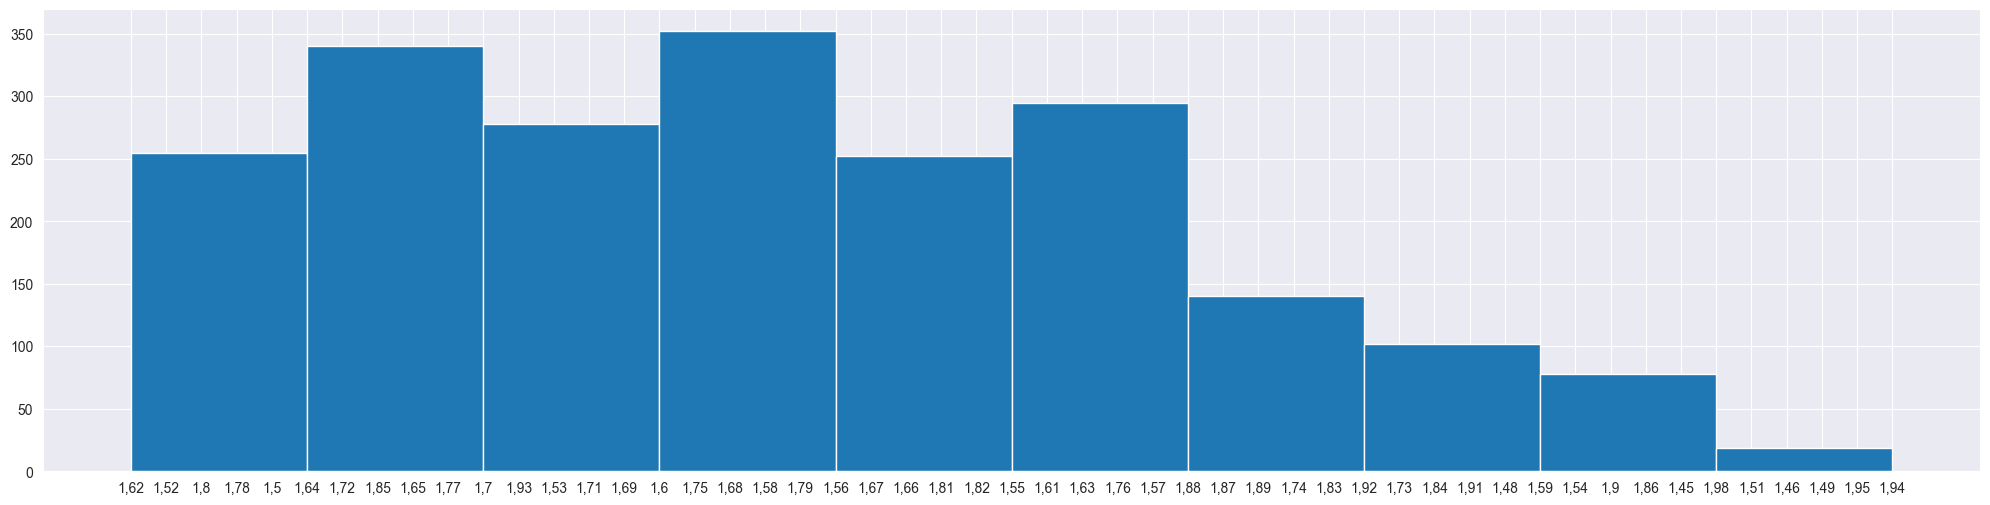

In [8]:
# Größe
plt.figure(figsize=(25, 6))
plt.hist(df['Größe'])
plt.show()

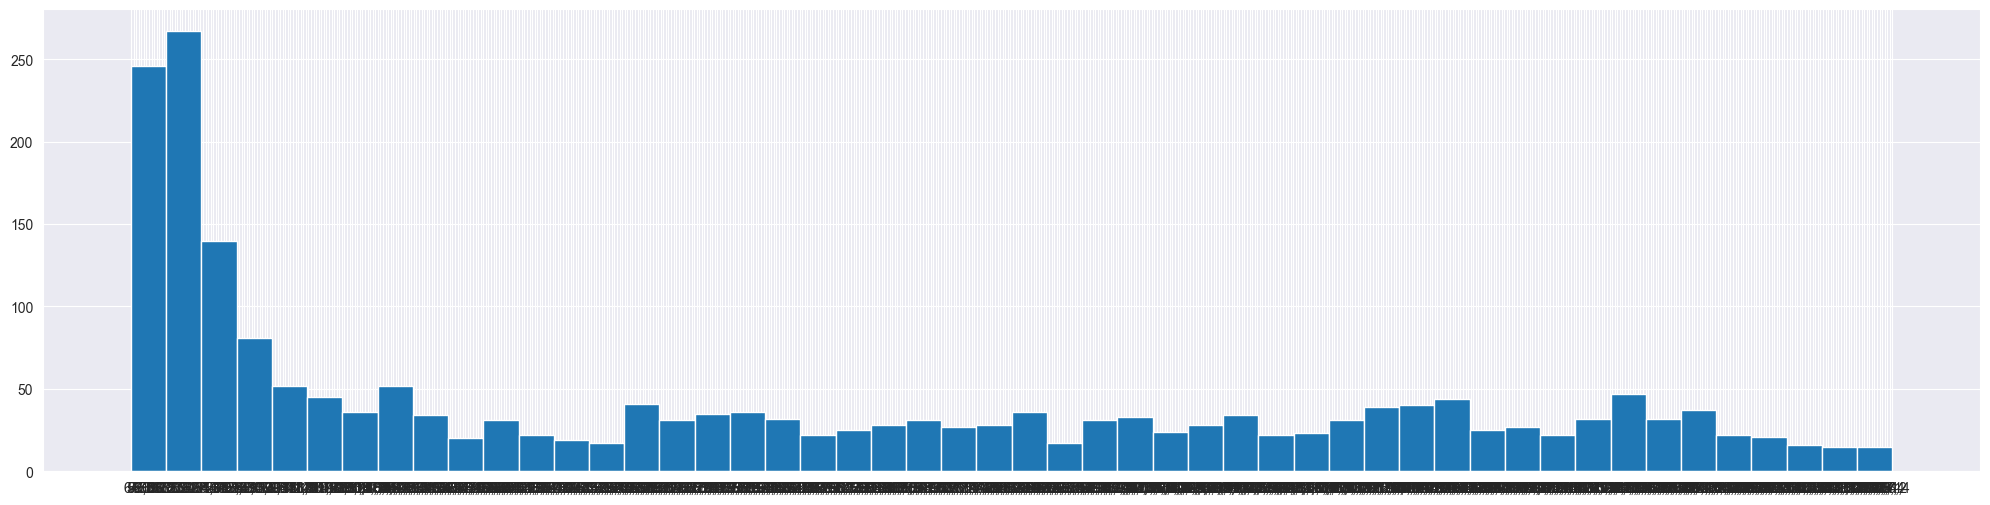

In [15]:
# Gewicht
plt.figure(figsize=(25, 6))
plt.hist(df['Gewicht'], bins=50)
plt.show()

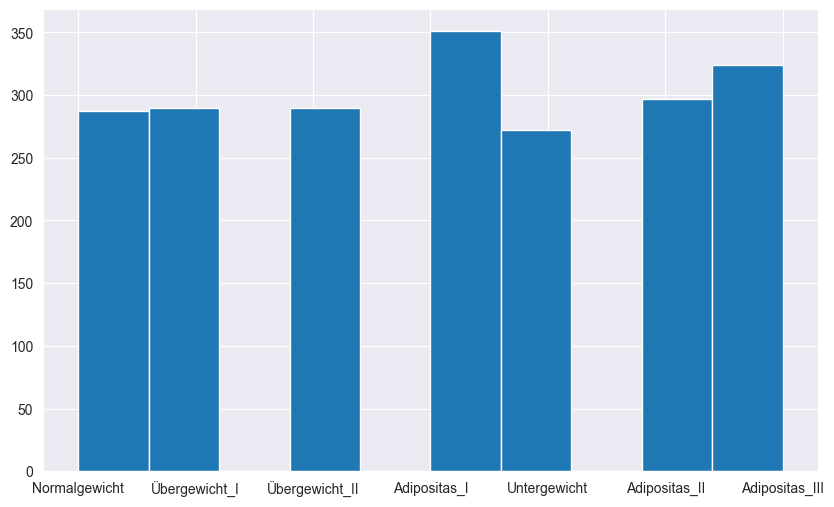

In [16]:
# Gewichtsklasse
plt.figure(figsize=(10, 6))
plt.hist(df['Gewichtsklasse'])
plt.show()

<Axes: xlabel='Alkohol', ylabel='Gewicht'>

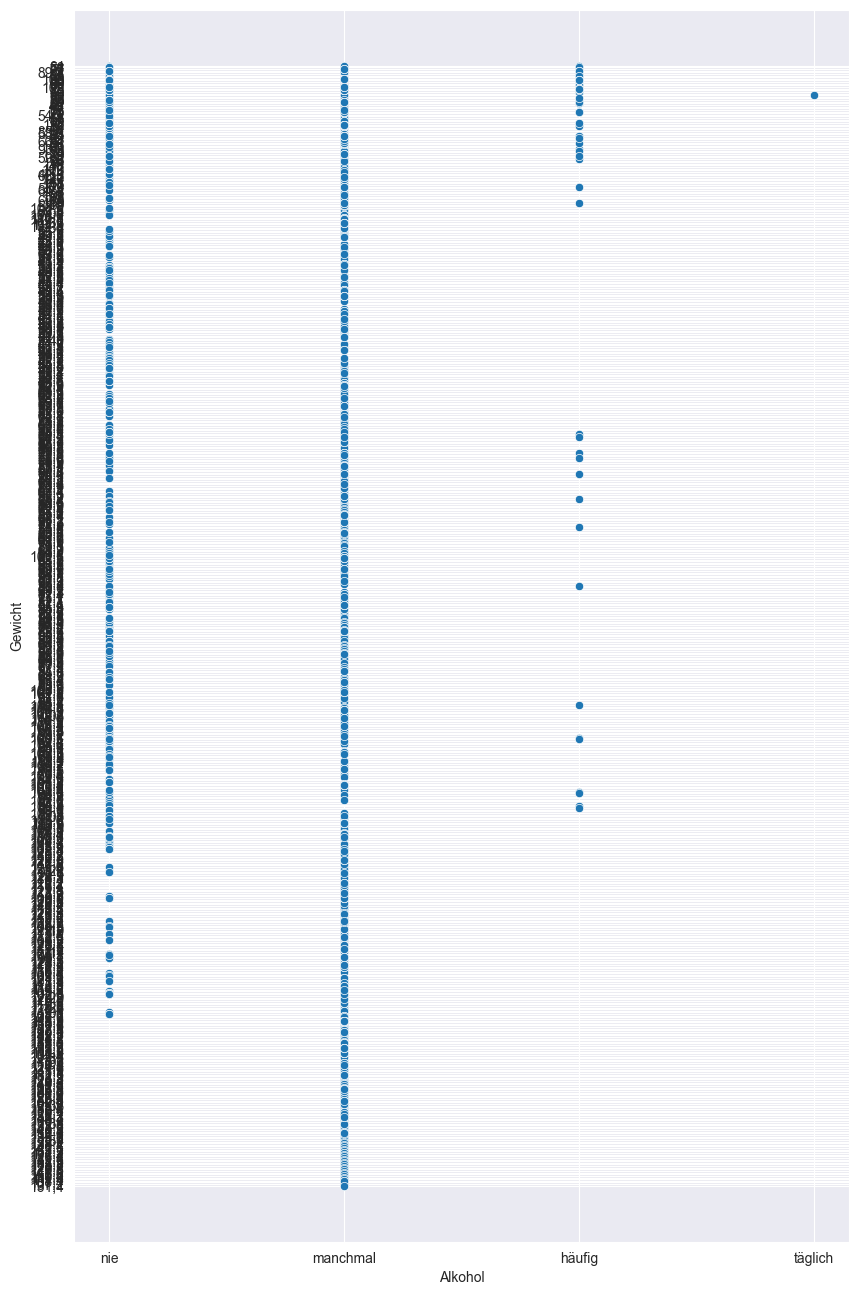

In [24]:
# Erstellt eine Visualisierung bzgl. der Zusammenhangs einer beliebig wählbaren kategoriellen Variable und „Gewicht“.
#plt.figure(figsize=(10, 16))
#sns.scatterplot(x='Alkohol', y='Gewicht', data=df)


In [41]:
# Erstellt eine Korrelationsmatrix mit den numerischen Variablen. Diskutiert die erhalten Korrelationen.
df.head()
# replace , with . for every Größe value
df['Größe'] = df['Größe'].apply(lambda x: re.sub(',', '.', x))
df['Gewicht'] = df['Gewicht'].apply(lambda x: re.sub(',', '.', x))
df['Wasser'] = df['Wasser'].apply(lambda x: re.sub(',', '.', x))
df['Aktivität'] = df['Aktivität'].apply(lambda x: re.sub(',', '.', x))
df['Bildschirmzeit'] = df['Bildschirmzeit'].apply(lambda x: re.sub(',', '.', x))
df[['Alter', 'Größe', 'Gewicht', 'Gemüse', 'Hauptmahlzeiten', 'Wasser', 'Aktivität', 'Bildschirmzeit']].corr()

,Alter,Größe,Gewicht,Gemüse,Hauptmahlzeiten,Wasser,Aktivität,Bildschirmzeit
Alter,1.000000,-0.025775,0.203443,0.017020,-0.043951,-0.045583,-0.145147,-0.296601
Größe,-0.025775,1.000000,0.462283,-0.038580,0.243387,0.213469,0.295270,0.051578
Gewicht,0.203443,0.462283,1.000000,0.216263,0.107405,0.200540,-0.051442,-0.071548
Gemüse,0.017020,-0.038580,0.216263,1.000000,0.042045,0.068401,0.019889,-0.101202
Hauptmahlzeiten,-0.043951,0.243387,0.107405,0.042045,1.000000,0.056936,0.129537,0.036404
Wasser,-0.045583,0.213469,0.200540,0.068401,0.056936,1.000000,0.167088,0.011915
Aktivität,-0.145147,0.295270,-0.051442,0.019889,0.129537,0.167088,1.000000,0.058561
Bildschirmzeit,-0.296601,0.051578,-0.071548,-0.101202,0.036404,0.011915,0.058561,1.000000


In [42]:
df.drop('Gewicht', axis=1)

,Alter,Geschlecht,Größe,Alkohol,Fastfood,Gemüse,Hauptmahlzeiten,Kalorienzählen,Rauchen,Wasser,Familie,Aktivität,Bildschirmzeit,Zwischenmahlzeit,Transportmittel,Gewichtsklasse
0,21,w,1.62,nie,nein,2,3,nein,nein,2,ja,0,1,manchmal,ÖPV,Normalgewicht
1,21,w,1.52,manchmal,nein,3,3,ja,ja,3,ja,3,0,manchmal,ÖPV,Normalgewicht
2,23,m,1.8,häufig,nein,2,3,nein,nein,2,ja,2,1,manchmal,ÖPV,Normalgewicht
3,27,m,1.8,häufig,nein,3,3,nein,nein,2,nein,2,0,manchmal,Fuss,Übergewicht_I
4,22,m,1.78,manchmal,nein,2,1,nein,nein,2,nein,0,0,manchmal,ÖPV,Übergewicht_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,w,1.71,manchmal,ja,3,3,nein,nein,1.73,ja,1.6763,0.9062,manchmal,ÖPV,Adipositas_III
2107,22,w,1.75,manchmal,ja,3,3,nein,nein,2.01,ja,1.3414,0.5993,manchmal,ÖPV,Adipositas_III
2108,23,w,1.75,manchmal,ja,3,3,nein,nein,2.05,ja,1.4142,0.6463,manchmal,ÖPV,Adipositas_III
2109,24,w,1.74,manchmal,ja,3,3,nein,nein,2.85,ja,1.1391,0.586,manchmal,ÖPV,Adipositas_III


In [ ]:
#  Im ersten Schritt ermitteln alle Gruppen die Güte des „most frequent classifier“ (dummy classifier).
quality.most_frequent_classifier(df['Gewichtsklasse'])